In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
load_path = r'../preprocessing_data/'
load_sub = r'../data/'

train_df = pd.read_csv(load_path + 'preprocessed_train.csv')
test_df = pd.read_csv(load_path + 'preprocessed_test.csv')
submission = pd.read_csv(load_sub + 'submission.csv')

# Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = train_df.drop(['box_off_num'], axis = 1)
y = train_df['box_off_num']

In [6]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state = 2024)

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [8]:
lr = LinearRegression()
lr.fit(train_x, train_y)

lr_pred = lr.predict(valid_x)

lr_mae = mean_absolute_error(valid_y, lr_pred)
lr_rmse = root_mean_squared_error(valid_y, lr_pred)

print(f'''
Linear Regression
    MAE : {lr_mae}
    RMSE : {lr_rmse}
''')


Linear Regression
    MAE : 782779.641114027
    RMSE : 1391751.0158901948



# visualization

In [9]:
valid_y.shape

(120,)

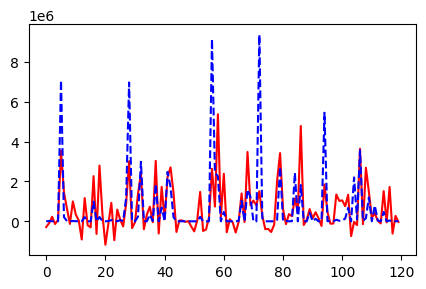

In [10]:
plt.figure(figsize = (5, 3))

plt.plot(range(120), lr_pred, color = 'red')
plt.plot(range(120), valid_y, color = 'blue', linestyle = '--')

plt.show()

# test data

In [11]:
test_x = test_df

test_pred = lr.predict(test_x)

In [12]:
submission['box_off_num'] = test_pred

submission

,title,box_off_num
0,용서는 없다,1.993902e+06
1,아빠가 여자를 좋아해,2.214035e+06
2,하모니,2.321548e+06
3,의형제,3.296664e+06
4,평행 이론,2.061726e+06
...,...,...
238,해에게서 소년에게,-4.908295e+05
239,울보 권투부,5.010336e+04
240,어떤살인,1.605394e+06
241,말하지 못한 비밀,-1.593556e+05


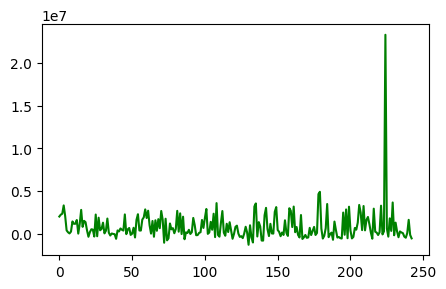

In [13]:
plt.figure(figsize = (5, 3))

plt.plot(range(243), test_pred, color = 'green')

plt.show()

In [14]:
cond = submission['box_off_num'] == max(test_pred)

submission[cond]

,title,box_off_num
224,슈퍼레이서 엔지,2.331882e+07


In [20]:
sorted_sub = submission.sort_values(['box_off_num'], ascending = False)
sorted_sub[:5]

,title,box_off_num
224,슈퍼레이서 엔지,2.331882e+07
179,군도: 민란의 시대,4.895072e+06
178,명량,4.624070e+06
229,베테랑,3.642502e+06
108,신세계,3.567362e+06
